In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'D:\downloads\Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


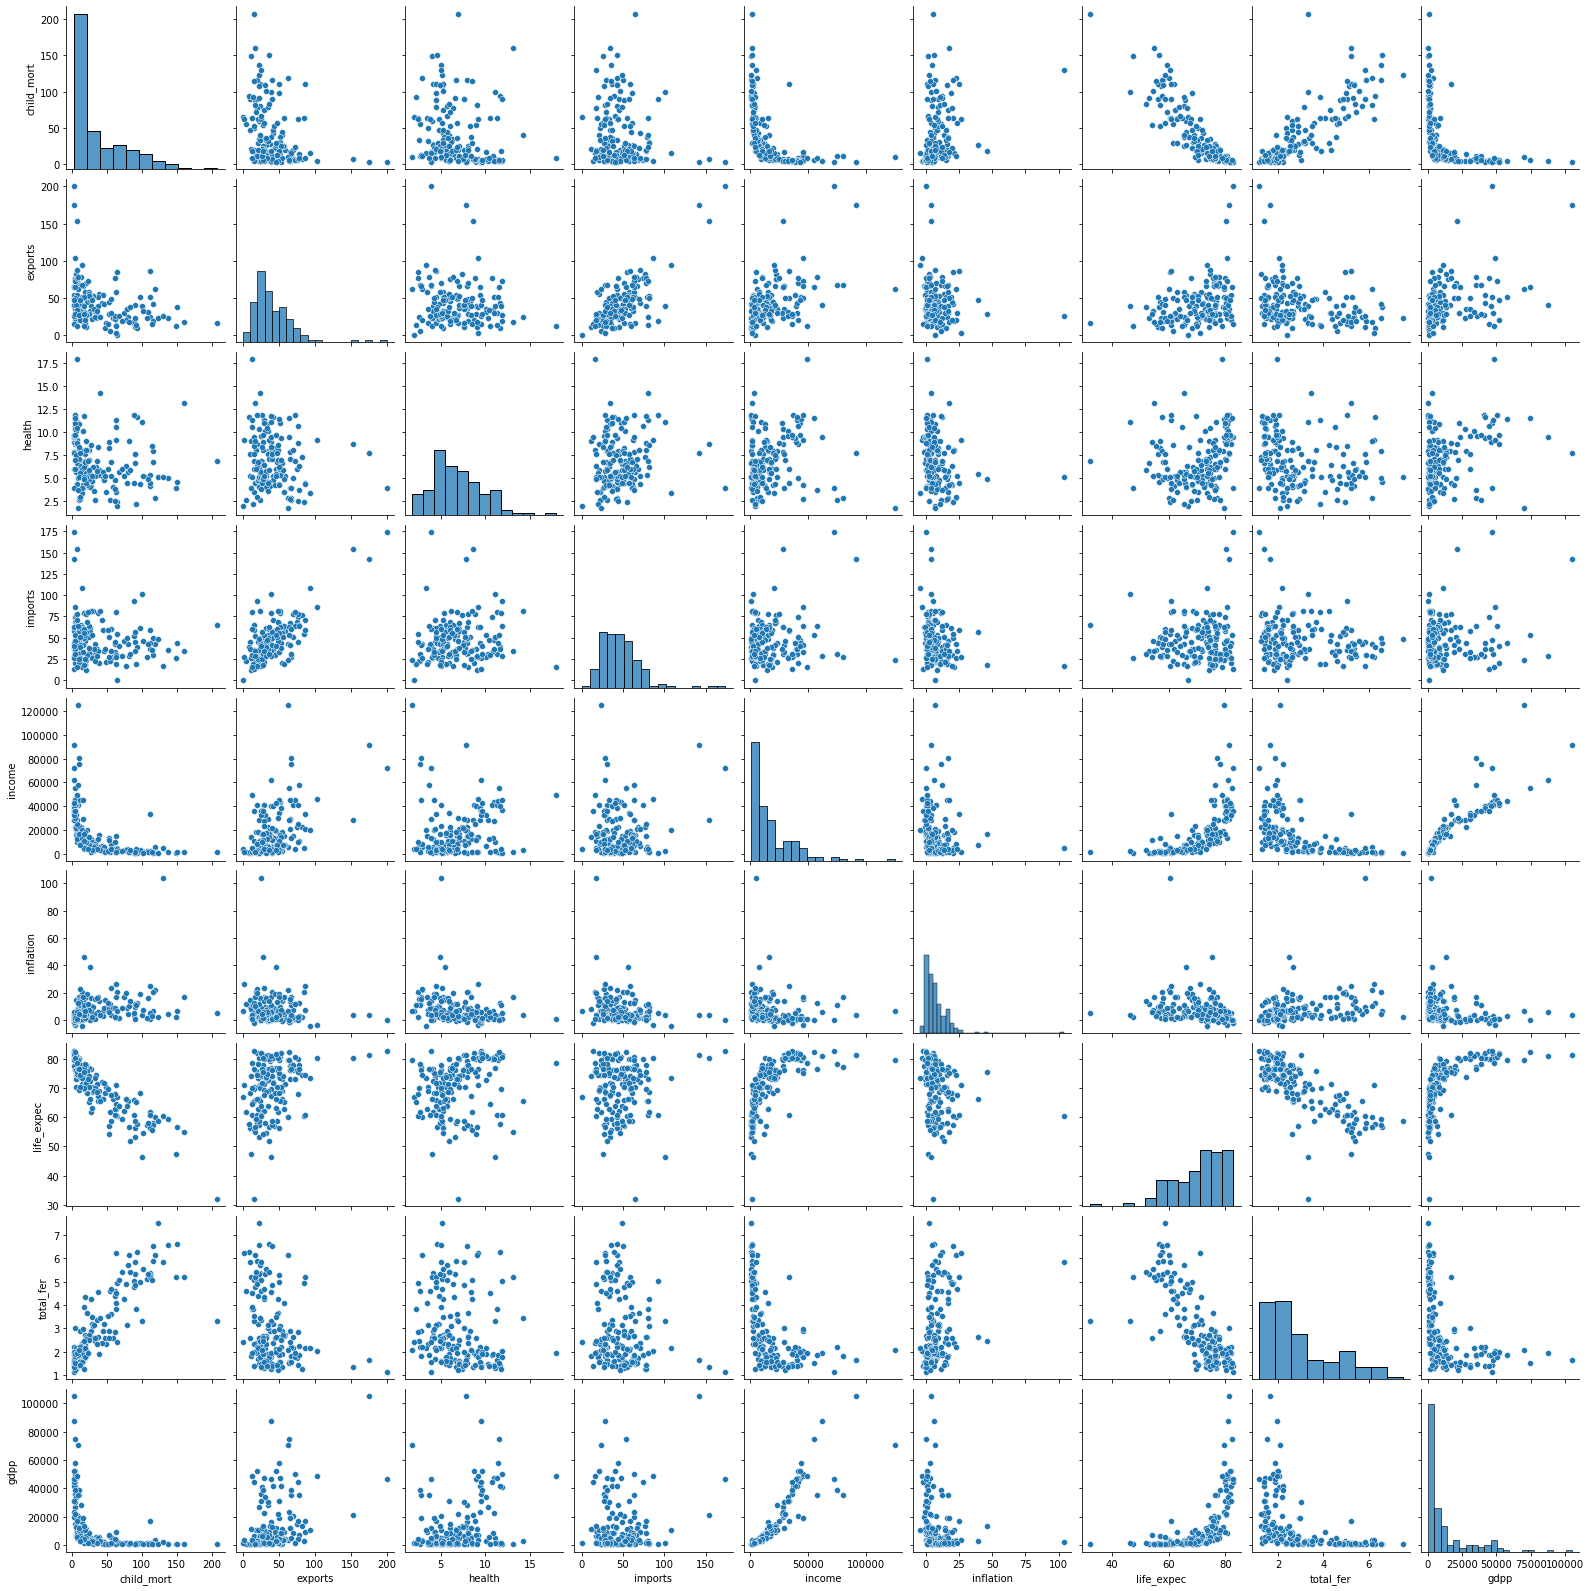

In [6]:
import seaborn as sns
sns.pairplot(data)

In [7]:
df=data.drop('country',axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
norm=norm.fit_transform(df)
norm=pd.DataFrame(norm,columns=df.columns)
norm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.016046,0.005725,0.001382,0.009435,0.857365,0.001821,0.012721,0.000915,0.480679
std,0.031387,0.007224,0.002301,0.014596,0.100431,0.003551,0.015572,0.001604,0.148078
min,0.000020,0.000028,0.000013,0.000017,0.456921,-0.000182,0.000554,0.000012,0.236038
25%,0.000285,0.001424,0.000230,0.001245,0.831418,0.000082,0.002767,0.000063,0.371936
50%,0.002000,0.002995,0.000503,0.004042,0.894966,0.000515,0.006146,0.000195,0.443171
75%,0.016766,0.007075,0.001419,0.011165,0.925480,0.001989,0.016035,0.000956,0.555628
max,0.163415,0.057900,0.015013,0.117818,0.971387,0.029302,0.081003,0.009213,0.889144


# KMeans Clustering

C:\Users\Rajasree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


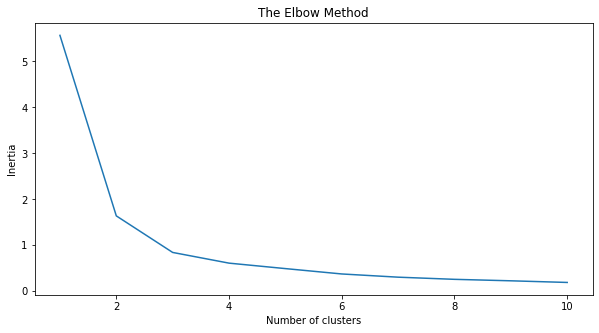

In [9]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(norm)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(norm)
y_kmeans=pd.Series(y_kmeans)
y_kmeans

0      1
1      1
2      1
3      2
4      2
      ..
162    0
163    0
164    1
165    1
166    1
Length: 167, dtype: int32

In [11]:
y_kmeans.value_counts()

1    82
2    52
0    33
dtype: int64

In [12]:
from sklearn.metrics import silhouette_score
score = silhouette_score(norm,y_kmeans , metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.520


In [13]:
data['cluster']=y_kmeans
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [14]:
data['cluster'].value_counts()

1    82
2    52
0    33
Name: cluster, dtype: int64

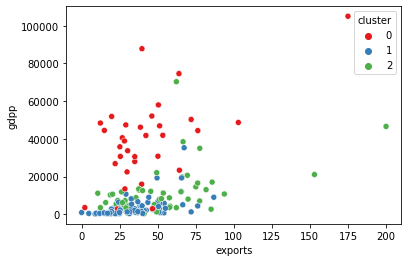

In [15]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

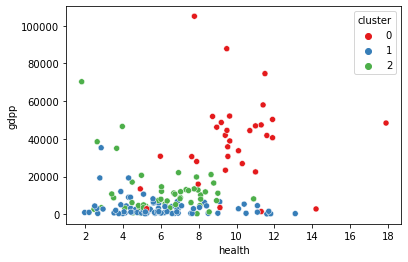

In [16]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

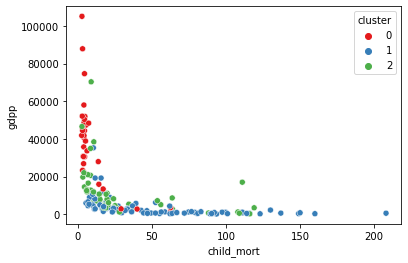

In [17]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

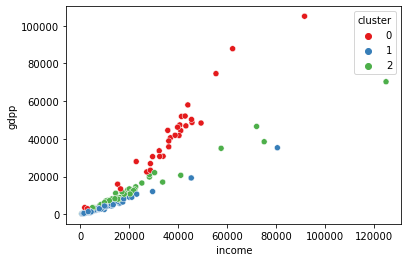

In [18]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

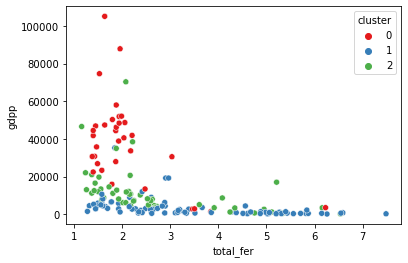

In [19]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

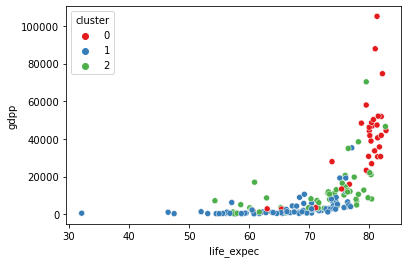

In [20]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster', legend = 'full', data = data, palette='Set1')
plt.show()

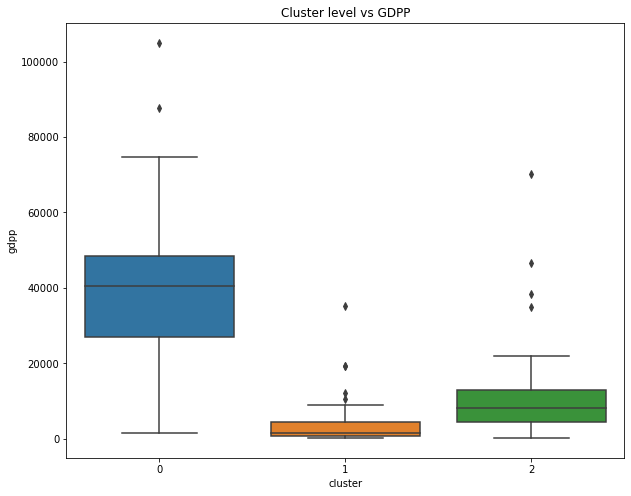

In [21]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP')
sns.boxplot(data=data,x='cluster',y='gdpp')
plt.show()

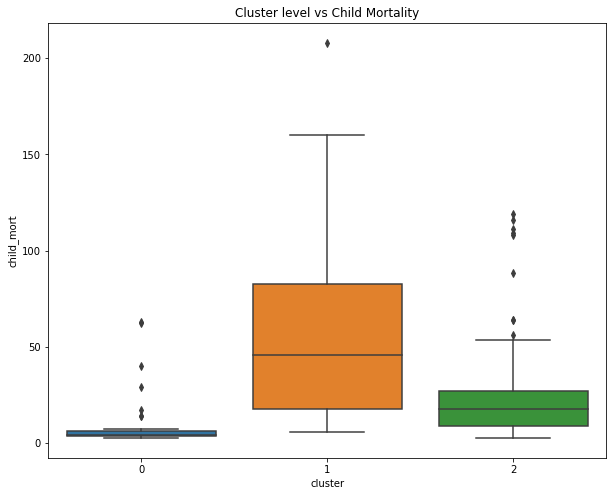

In [22]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Child Mortality')
sns.boxplot(data=data,x='cluster',y='child_mort')
plt.show()

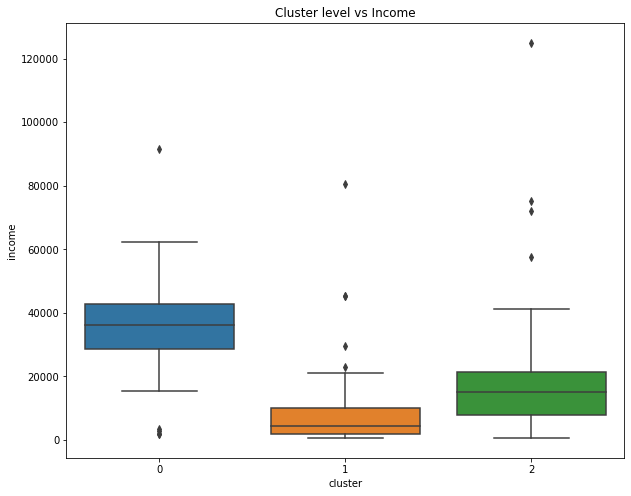

In [23]:
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(data=data,x='cluster',y='income')
plt.show()

Cluster 1 has very low income and gdpp and very high child mortality rate 

In [24]:
pd.set_option('max_rows', None)
data[data['cluster']==1]['country']

0                   Afghanistan
1                       Albania
2                       Algeria
6                       Armenia
9                    Azerbaijan
12                   Bangladesh
14                      Belarus
17                        Benin
18                       Bhutan
19                      Bolivia
20       Bosnia and Herzegovina
21                     Botswana
23                       Brunei
24                     Bulgaria
25                 Burkina Faso
26                      Burundi
27                     Cambodia
31     Central African Republic
32                         Chad
34                        China
40                Cote d'Ivoire
47                        Egypt
48                  El Salvador
50                      Eritrea
56                       Gambia
57                      Georgia
59                        Ghana
62                    Guatemala
64                Guinea-Bissau
66                        Haiti
69                        India
70      

According to KMeans Clustering there are 82 countries which needs the attention of NGO. 

# Hierarchical Clustering

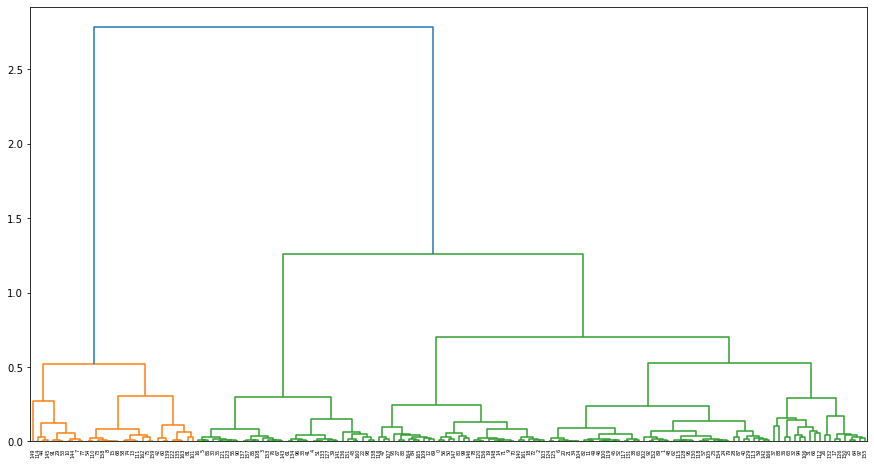

In [25]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(norm,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(norm)
print(labels)

[0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0]


In [27]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [28]:
data1=data.drop('cluster',axis=1)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
data1['labels']=labels
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [30]:
data1['labels'].value_counts()

0    134
1     33
Name: labels, dtype: int64

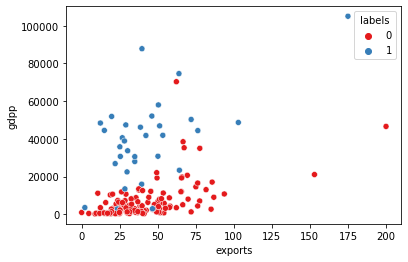

In [31]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

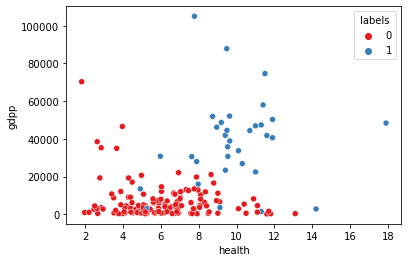

In [32]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

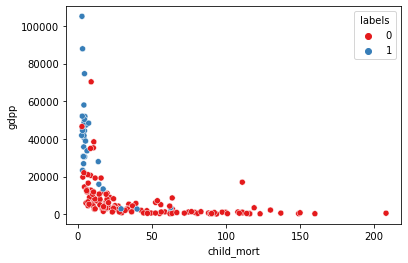

In [33]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

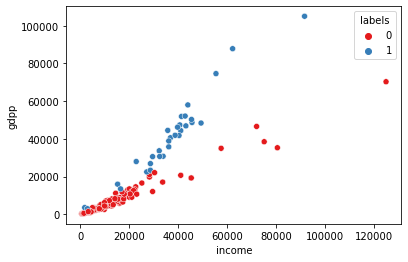

In [34]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

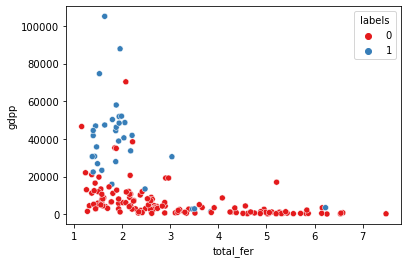

In [35]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

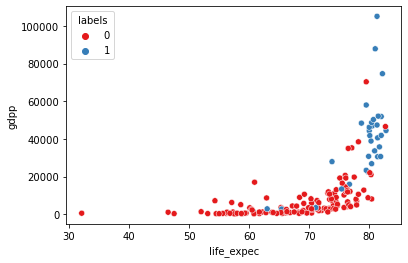

In [36]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='labels', legend = 'full', data = data1, palette='Set1')
plt.show()

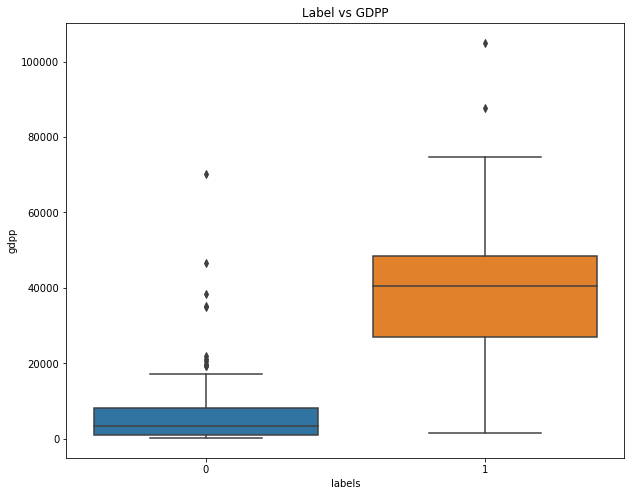

In [37]:
plt.figure(figsize=(10,8))
plt.title('Label vs GDPP')
sns.boxplot(data=data1,x='labels',y='gdpp')
plt.show()

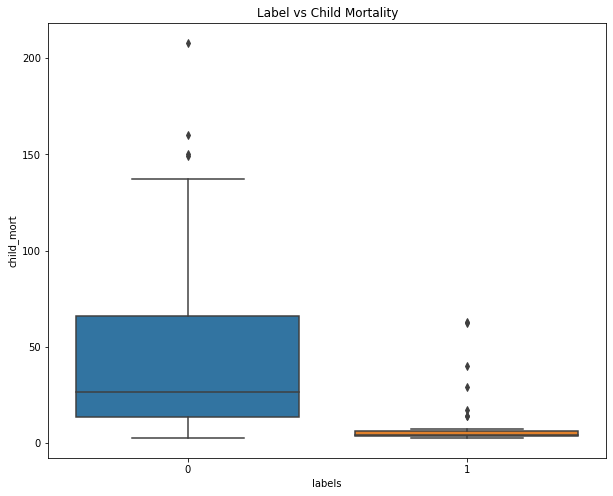

In [38]:
plt.figure(figsize=(10,8))
plt.title('Label vs Child Mortality')
sns.boxplot(data=data1,x='labels',y='child_mort')
plt.show()

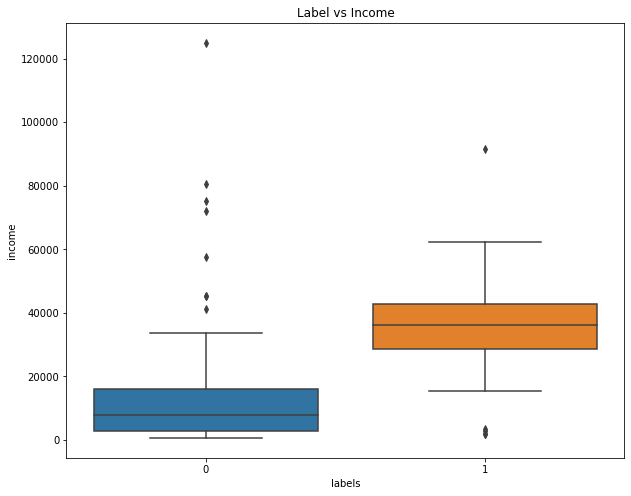

In [39]:
plt.figure(figsize=(10,8))
plt.title('Label vs Income')
sns.boxplot(data=data1,x='labels',y='income')
plt.show()

cluster 0 have low income and low gdpp and high child_mort.

In [40]:
pd.set_option('max_rows', None)
data1[data1['labels']==0]['country']

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
11                            Bahrain
12                         Bangladesh
14                            Belarus
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26                            Burundi
27                           Cambodia
28                           Cameroon
30                         Cape Verde
31           Central African Republic
32          

According to Hierarchical Clustering there are 134 countries which needs the attention of NGO